In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Cleaning data

In [11]:
hacendado = pd.read_csv('Products of the choosen Brand.csv')

In [12]:
hacendado.head(5)

ProductID            _id  \
0          0  8480000591050   
1          1  8480000206572   
2          2  8480000807823   
3          3  8480000340245   
4          4  8480000046093   

                                           _keywords additives_debug_tags  \
0  ['salchichon', 'hacendado', 'pavo', 'fiambre',...                  NaN   
1  ['sin', 'para', 'beber', 'producto', 'fermenta...                   []   
2  ['crangejo', 'gluten', 'hacendado', 'de', 'ens...                   []   
3  ['vegano', 'mondada', 'fruto', 'vegetariano', ...                   []   
4  ['beverage', 'and', 'hacendado', 'de', 'oliva'...                   []   

   additives_n  additives_old_n  \
0          6.0              6.0   
1          NaN              NaN   
2          NaN              NaN   
3          0.0              0.0   
4          NaN              NaN   

                                  additives_old_tags  \
0  ['en:e450', 'en:e451', 'en:e301', 'en:e250', '...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                             additives_original_tags  \
0  ['en:e450', 'en:e451', 'en:e301', 'en:e250', '...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

  additives_prev_original_tags  \
0                          NaN   
1                           []   
2                           []   
3                           []   
4                           []   

                                      additives_tags  ...  traces_lc  \
0  ['en:e120', 'en:e250', 'en:e252', 'en:e301', '...  ...        NaN   
1                                                 []  ...         es   
2                                                 []  ...         es   
3                                                 []  ...         es   
4                                                 []  ...         en   

                 traces_tags unique_scans_n unknown_ingredients_n  \
0                         []            NaN                   6.0   
1                         []           13.0                   NaN   
2                         []            NaN                   NaN   
3  ['en:nuts', 'en:peanuts']          206.0                   0.0   
4                         []            NaN                   NaN   

  unknown_nutrients_tags update_key  \
0                     []    origins   
1                     []    origins   
2                     []    origins   
3                     []    origins   
4                     []    origins   

                                                 url vitamins_prev_tags  \
0  https://world.openfoodfacts.org/product/848000...                NaN   
1  https://world.openfoodfacts.org/product/848000...                 []   
2  https://world.openfoodfacts.org/product/848000...                 []   
3  https://world.openfoodfacts.org/product/848000...                 []   
4  https://world.openfoodfacts.org/product/848000...                 []   

  vitamins_tags with_sweeteners  
0            []             NaN  
1            []             NaN  
2            []             NaN  
3            []             NaN  
4            []             NaN  

[5 rows x 994 columns]

Complete missings in product_name with product_name_en and product_name_es  
Complete missings in nova_groups with nova_group_debug

In [13]:
hacendado['product_name'].fillna(hacendado['product_name_es'], inplace=True)
hacendado['product_name'].fillna(hacendado['product_name_en'], inplace=True)
hacendado['nova_groups'].fillna(hacendado['nova_group_debug'], inplace=True)

## Get the right info about nutrition

In [14]:
nutrition_data = [ 'product_name',
'categories',
 'categories_hierarchy',
 'nova_groups',
'nova_groups_tags',
 'nutriscore_data',
 'nutriscore_grade',
 'nutriscore_score',
 'nutrition_score_beverage',
]

In [15]:
nutri_df = hacendado[nutrition_data]

In [16]:
nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_name              5020 non-null   object 
 1   categories                3275 non-null   object 
 2   categories_hierarchy      4538 non-null   object 
 3   nova_groups               5036 non-null   object 
 4   nova_groups_tags          1425 non-null   object 
 5   nutriscore_data           2835 non-null   object 
 6   nutriscore_grade          2835 non-null   object 
 7   nutriscore_score          2835 non-null   float64
 8   nutrition_score_beverage  3317 non-null   float64
dtypes: float64(2), object(7)
memory usage: 354.2+ KB


In [17]:
nutri_df.columns

Index(['product_name', 'categories', 'categories_hierarchy', 'nova_groups',
       'nova_groups_tags', 'nutriscore_data', 'nutriscore_grade',
       'nutriscore_score', 'nutrition_score_beverage'],
      dtype='object')

Explode the categories to get statistics per categories

In [18]:
nutri_df['categories_hierarchy'].fillna('[]', inplace=True)

In [19]:
nutri_df['categories_hierarchy'] = nutri_df['categories_hierarchy'].apply(lambda x: x[1:-1].split(', '))

In [20]:
nutri_df = nutri_df.explode('categories_hierarchy')

In [21]:
nutri_df.reset_index(inplace=True)

In [22]:
nutri_df.rename({'index':'product_id'}, axis=1)

product_id         product_name  \
0               0   Salchichón de pavo   
1               0   Salchichón de pavo   
2               1              L.casei   
3               1              L.casei   
4               1              L.casei   
...           ...                  ...   
19979        5034   Golosinas con pera   
19980        5035  Golosinas con fresa   
19981        5035  Golosinas con fresa   
19982        5035  Golosinas con fresa   
19983        5035  Golosinas con fresa   

                                              categories  \
0                                               fiambres   
1                                               fiambres   
2      Bebidas, Lácteos, Comidas fermentadas, Product...   
3      Bebidas, Lácteos, Comidas fermentadas, Product...   
4      Bebidas, Lácteos, Comidas fermentadas, Product...   
...                                                  ...   
19979          Botanas, Snacks dulces, Dulces, Golosinas   
19980          Botanas, Snacks dulces, Dulces, Golosinas   
19981          Botanas, Snacks dulces, Dulces, Golosinas   
19982          Botanas, Snacks dulces, Dulces, Golosinas   
19983          Botanas, Snacks dulces, Dulces, Golosinas   

       categories_hierarchy  \
0                'en:meats'   
1       'en:prepared-meats'   
2            'en:beverages'   
3              'en:dairies'   
4      'en:fermented-foods'   
...                     ...   
19979          'en:candies'   
19980           'en:snacks'   
19981     'en:sweet-snacks'   
19982  'en:confectioneries'   
19983          'en:candies'   

                                             nova_groups  \
0                                                      4   
1                                                      4   
2      no nova group when the product does not have i...   
3      no nova group when the product does not have i...   
4      no nova group when the product does not have i...   
...                                                  ...   
19979                                                  4   
19980                                                  4   
19981                                                  4   
19982                                                  4   
19983                                                  4   

                                       nova_groups_tags  \
0      ['en:4-ultra-processed-food-and-drink-products']   
1      ['en:4-ultra-processed-food-and-drink-products']   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
19979  ['en:4-ultra-processed-food-and-drink-products']   
19980  ['en:4-ultra-processed-food-and-drink-products']   
19981  ['en:4-ultra-processed-food-and-drink-products']   
19982  ['en:4-ultra-processed-food-and-drink-products']   
19983  ['en:4-ultra-processed-food-and-drink-products']   

                                         nutriscore_data nutriscore_grade  \
0      {'fiber': 0, 'proteins_value': 25, 'is_water':...                e   
1      {'fiber': 0, 'proteins_value': 25, 'is_water':...                e   
2      {'sodium_value': 40, 'sodium_points': 0, 'prot...                a   
3      {'sodium_value': 40, 'sodium_points': 0, 'prot...                a   
4      {'sodium_value': 40, 'sodium_points': 0, 'prot...                a   
...                                                  ...              ...   
19979  {'proteins_points': 0, 'sodium_points': 0, 'so...                c   
19980  {'saturated_fat_ratio_points': 6, 'fiber_point...                c   
19981  {'saturated_fat_ratio_points': 6, 'fiber_point...                c   
19982  {'saturated_fat_ratio_points': 6, 'fiber_point...                c   
19983  {'saturated_fat_ratio_points': 6, 'fiber_point...                c   

       nutriscore_score  nutrition_score_beverage  
0

## NutriScore first

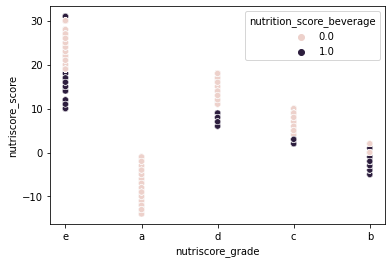

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=nutri_df['nutriscore_grade'], y=nutri_df['nutriscore_score'], hue=nutri_df['nutrition_score_beverage'])

Difference in score whether the product is a beverage of not > Split the Dataset in two

In [25]:
nutri_beverages = nutri_df[nutri_df['nutrition_score_beverage'] == 1.0]
nutri_food = nutri_df[nutri_df['nutrition_score_beverage'] != 1.0]

## Let's get the statistics in Beverage first

In [26]:
beverage_category_results = nutri_beverages.groupby('categories_hierarchy')[['nutriscore_score']].mean().sort_values(by='nutriscore_score')
beverage_category_results

nutriscore_score
categories_hierarchy                     
'en:blueberry-juices'                -5.0
'en:fruits'                          -4.0
'en:mango-juices'                    -4.0
'en:mangoes'                         -4.0
'en:lemon-juice'                     -4.0
...                                   ...
'en:powdered-cappucino'               NaN
'en:red-wines'                        NaN
'en:strawberry-syrups'                NaN
'en:syrups'                           NaN
'en:wines'                            NaN

[95 rows x 1 columns]

In [27]:
nutri_beverages.groupby('nutriscore_grade')['nutriscore_score'].max()

nutriscore_grade
b     1.0
c     5.0
d     9.0
e    31.0
Name: nutriscore_score, dtype: float64

In [28]:
def ranking(x):
    if x<= 1:
        return 'b'
    elif x<= 6:
        return 'c'
    elif x<= 9:
        return 'd'
    elif x<= 31:
        return 'e'
    else:
        return 'Unknown'

In [29]:
beverage_category_results['nutriscore_grade_category'] = beverage_category_results['nutriscore_score'].apply(ranking)

In [30]:
beverage_category_results.rename(columns={'nutriscore_score':'nutriscore_category'}, inplace=True)

In [31]:
beverage_category_results.head(30)

nutriscore_category  \
categories_hierarchy                                            
'en:blueberry-juices'                               -5.000000   
'en:fruits'                                         -4.000000   
'en:mango-juices'                                   -4.000000   
'en:mangoes'                                        -4.000000   
'en:lemon-juice'                                    -4.000000   
'en:tropical-fruits'                                -4.000000   
'en:peach-nectars'                                  -3.000000   
'en:vegetable-juices'                               -2.000000   
'en:concentrated-pear-juices'                       -2.000000   
'en:pear-juices'                                    -2.000000   
'en:vegetables-based-foods'                         -2.000000   
'en:vegetable-based-foods-and-beverages'            -2.000000   
'en:tomatoes-and-their-products'                    -2.000000   
'en:vegetable-based-beverages'                      -2.000000   
'en:tomato-juices'                                  -2.000000   
'en:flavored-teas'                                   1.000000   
'en:black-teas'                                      1.000000   
'en:instant-beverages'                               1.000000   
'en:concentrated-multifruit-juices'                  1.250000   
'en:fruits-and-vegetables-based-foods'               1.333333   
'en:green-teas'                                      1.600000   
'en:concentrated-fruit-juices'                       1.714286   
'en:light-iced-teas'                                 2.000000   
'en:chinese-green-teas'                              2.000000   
'en:lemon-teas'                                      2.000000   
'en:light-fruit-sodas'                               2.000000   
'en:tea-based-beverages'                             2.000000   
'en:light-lemon-soft-drinks'                         2.000000   
'en:fruit-juices'                                    2.418605   
'en:orange-juices'                                   2.714286   

                                         nutriscore_grade_category  
categories_hierarchy                                                
'en:blueberry-juices'                                            b  
'en:fruits'                                                      b  
'en:mango-juices'                                                b  
'en:mangoes'                                                     b  
'en:lemon-juice'                                                 b  
'en:tropical-fruits'                                             b  
'en:peach-nectars'                                               b  
'en:vegetable-juices'                                            b  
'en:concentrated-pear-juices'                                    b  
'en:pear-juices'                                                 b  
'en:vegetables-based-foods'                                      b  
'en:vegetable-based-foods-and-beverages'                         b  
'en:tomatoes-and-their-products'                                 b  
'en:vegetable-based-beverages'                                   b  
'en:tomato-juices'                                               b  
'en:flavored-teas'                                               b  
'en:black-teas'                                                  b  
'en:instant-beverages'                                           b  
'en:concentrated-multifruit-juices'                              c  
'en:fruits-and-vegetables-based-foods'                           c  
'en:green-teas'                                                  c  
'en:concentrated-fruit-juices'                                   c  
'en:light-iced-teas'                                             c  
'en:chinese-green-teas'                                          c  
'en:lemon-teas'                                                  c  
'en:light-fruit-sodas'                                           c  
'en:tea-based-beverages'     

## Food categories

In [22]:
food_category_results = nutri_food.groupby('categories_hierarchy')[['nutriscore_score']].mean().sort_values(by='nutriscore_score')
food_category_results

nutriscore_score
categories_hierarchy                           
'en:butter-beans'                    -14.000000
'en:frozen-lima-beans'               -14.000000
'en:frozen-chickpeas'                -13.000000
'en:frozen-artichoke-hearts'         -12.000000
'en:frozen-fresh-broad-beans'        -11.333333
...                                         ...
'en:xeres-vinegars'                         NaN
'en:yeast'                                  NaN
'es:infusiones-relajantes'                  NaN
'fr:capsicum-frutescens'                    NaN
'fr:miels-cremeux'                          NaN

[1235 rows x 1 columns]

In [23]:
nutri_food.groupby('nutriscore_grade')['nutriscore_score'].max()

nutriscore_grade
a    -1.0
b     2.0
c    10.0
d    18.0
e    30.0
Name: nutriscore_score, dtype: float64

In [24]:
def ranking2(x):
    if x<= -1:
        return 'a'
    elif x<= 2:
        return 'b'
    elif x<= 10:
        return 'c'
    elif x<= 18:
        return 'd'
    elif x<= 30:
        return 'e'
    else:
        return 'Unknown'

In [25]:
food_category_results['nutriscore_grade_category'] = food_category_results['nutriscore_score'].apply(ranking2)

In [26]:
food_category_results.rename(columns={'nutriscore_score':'nutriscore_category'}, inplace=True)

In [27]:
food_category_results

nutriscore_category nutriscore_grade_category
categories_hierarchy                                                        
'en:butter-beans'                       -14.000000                         a
'en:frozen-lima-beans'                  -14.000000                         a
'en:frozen-chickpeas'                   -13.000000                         a
'en:frozen-artichoke-hearts'            -12.000000                         a
'en:frozen-fresh-broad-beans'           -11.333333                         a
...                                            ...                       ...
'en:xeres-vinegars'                            NaN                   Unknown
'en:yeast'                                     NaN                   Unknown
'es:infusiones-relajantes'                     NaN                   Unknown
'fr:capsicum-frutescens'                       NaN                   Unknown
'fr:miels-cremeux'                             NaN                   Unknown

[1235 rows x 2 columns]

## NOVA

In [28]:
nutri_df['nova_groups'].unique()

array([4.0, 'no nova group when the product does not have ingredients',
       1.0, 2.0,
       'no nova group if too many ingredients are unknown: 11 out of 11',
       'no nova group if too many ingredients are unknown: 3 out of 3',
       3.0,
       'no nova group if too many ingredients are unknown: 1 out of 1',
       'no nova group if too many ingredients are unknown: 12 out of 16',
       'no nova group if too many ingredients are unknown: 2 out of 2',
       'no nova group if too many ingredients are unknown: 19 out of 26',
       'no nova group if too many ingredients are unknown: 8 out of 8',
       'no nova group if too many ingredients are unknown: 22 out of 37',
       'no nova group if too many ingredients are unknown: 31 out of 42',
       'no nova group if too many ingredients are unknown: 13 out of 18',
       'no nova group if too many ingredients are unknown: 2 out of 3',
       'no nova group when the product does not have a category',
       'no nova group if too 

In [29]:
def nova_cat(x):
    if x == 1.0:
        return 1.0
    elif x == 2.0:
        return 2.0
    elif x == 3.0:
        return 3.0
    elif x == 4.0:
        return 4.0
    else:
        return 'Nan'
    
nutri_df['nova'] = nutri_df['nova_groups'].apply(nova_cat)

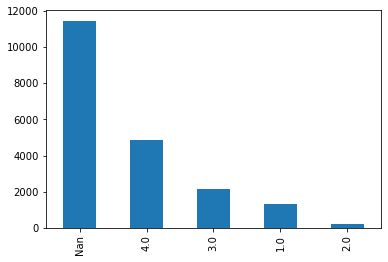

In [30]:
nutri_df['nova'].value_counts().plot.bar();

In [31]:
nutri_df['nova'] = nutri_df['nova'].astype('float')

In [32]:
nova_category_results = nutri_df[nutri_df['nova'] != 'Unknown'].groupby('categories_hierarchy')[['nova']].mean().sort_values(by='nova')

In [33]:
nova_category_results.rename(columns={'nova':'nova_category'}, inplace=True)

In [34]:
nova_category_results

nova_category
categories_hierarchy                             
'en:fresh-vegetables'                         1.0
'en:ground-dried-parsley'                     1.0
'en:ground-dried-oregano'                     1.0
'en:ground-dried-mint'                        1.0
'en:ground-dried-dill'                        1.0
...                                           ...
'fr:biscuits-tablette-fourree'                NaN
'fr:boudins'                                  NaN
'fr:capsicum-frutescens'                      NaN
'fr:fouets-catalans'                          NaN
'fr:spaghettis-de-ble-dur-complet'            NaN

[1300 rows x 1 columns]